### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [1]:
using LinearAlgebra, CSV, DataFrames, Statistics, Plots, Plots.PlotMeasures

In [2]:
function random_array(size)
    return rand(1:200, size, size)
end

function random_vector(size)
    return rand(1:200, size)
end

# Row odpowiada za strukturę pliku CSV
struct Row
    calc_type::String
    size::Int64
    time::Float64
end

In [3]:
# "Rozgrzanie"
dot(random_vector(1000), random_vector(1000))
random_array(1000)*random_vector(1000)

rows = Row[]

for i = 1:10
    for _ = 1:10
        arr = random_array(1000*i)
        vec1 = random_vector(1000*i)
        vec2 = random_vector(1000*i)
    
        dot_stat = @timed dot(vec1, vec2)
        prod_stat = @timed arr*vec1

        push!(rows, Row("dot", 1000*i, dot_stat.time))
        push!(rows, Row("product", 1000*i, prod_stat.time))
    end
    println("Size ", 1000*i," done!")
end

CSV.write("readings.csv", rows)

Size 1000 done!
Size 2000 done!
Size 3000 done!
Size 4000 done!
Size 5000 done!
Size 6000 done!
Size 7000 done!
Size 8000 done!
Size 9000 done!
Size 10000 done!


"readings.csv"

In [4]:
df = CSV.read("readings.csv", DataFrame)

Row,calc_type,size,time
,String7,Int64,Float64
1,dot,1000,7.07e-7
2,product,1000,0.000523142
3,dot,1000,6.05e-7
4,product,1000,0.000426005
5,dot,1000,6.05e-7
6,product,1000,0.000437861
7,dot,1000,6.94e-7
8,product,1000,0.000448664
9,dot,1000,5.69e-7


In [5]:
result = sort(combine(groupby(df, [:calc_type, :size]), 
                 :time => (time -> mean(time)) => :mean, 
                 :time => (time -> std(time)) => :std
), [:calc_type])

Row,calc_type,size,mean,std
,String7,Int64,Float64,Float64
1,dot,1000,6.121e-7,5.78858e-8
2,dot,2000,1.001e-6,2.55327e-7
3,dot,3000,2.4496e-6,3.33331e-6
4,dot,4000,1.7755e-6,4.44431e-7
5,dot,5000,2.2845e-6,4.564e-7
6,dot,6000,2.764e-6,6.44457e-7
7,dot,7000,3.2068e-6,4.59493e-7
8,dot,8000,3.2654e-6,7.76651e-7
9,dot,9000,4.8698e-6,2.51148e-6


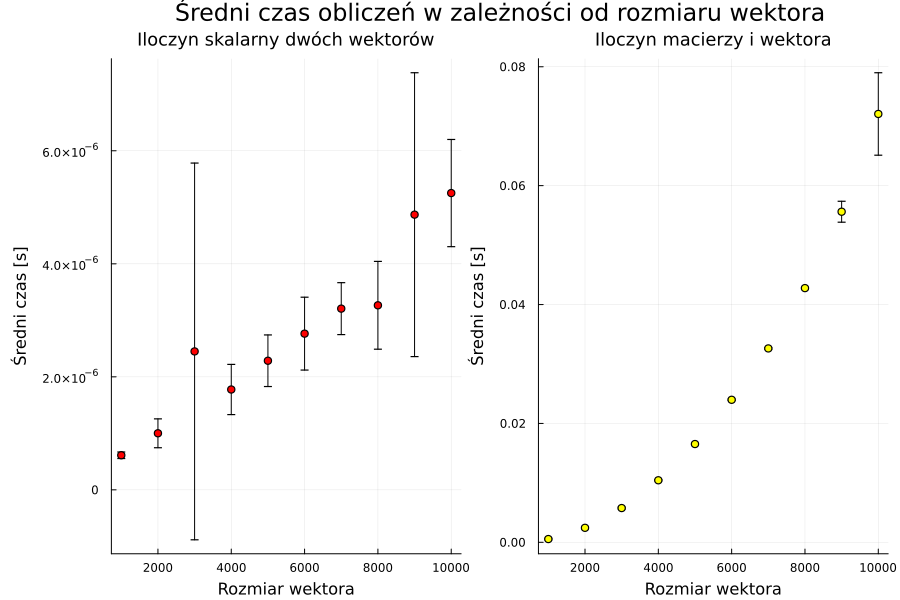

In [6]:
scatter(
    result.size, 
    result.mean, 
    group=result.calc_type, 
    yerror=result.std, 
    color=[:red :yellow], 
    layout=2, 
    legend=false, 
    titlefont=font(12),
    suptitle="Średni czas obliczeń w zależności od rozmiaru wektora", 
    size=(900,600),
    xlabel="Rozmiar wektora", 
    ylabel="Średni czas [s]",
)

plot!(
    title="Iloczyn skalarny dwóch wektorów", 
    subplot=1, 
    left_margin=5mm
)

plot!(
    title="Iloczyn macierzy i wektora", 
    subplot=2, 
)